# Introduction to neural network classification with TensorFlow

A classification is where you try to classify something as one thing or another
* Binary Classification
* Multiclass Classification
* Multilevel Classification

## Creating data to view and fit


In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 28)

In [2]:
# Checl out the labels
X[:10], y[:10]

(array([[ 0.71731677,  0.67579825],
        [-0.69320852, -0.75714993],
        [ 0.21432394, -1.01570213],
        [ 0.69808324, -0.4561967 ],
        [-0.62311553,  0.69825747],
        [ 0.04727107,  0.8119892 ],
        [-0.31007757, -0.7661716 ],
        [-0.00451568,  0.84788955],
        [-0.21373516,  0.77725423],
        [ 0.31059441,  0.95142806]]),
 array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0]))

Our data is little hard to understand right now... let's visualize it!

In [3]:
import pandas as pd
circles = pd.DataFrame({'X0': X[:, 0],
                        'X1': X[:, 1],
                        'label': y})
circles

,X0,X1,label
0,0.717317,0.675798,0
1,-0.693209,-0.757150,0
2,0.214324,-1.015702,0
3,0.698083,-0.456197,1
4,-0.623116,0.698257,0
...,...,...,...
995,-0.972493,-0.120349,0
996,0.894717,0.456748,0
997,-0.904568,-0.326913,0
998,0.761534,0.122859,1


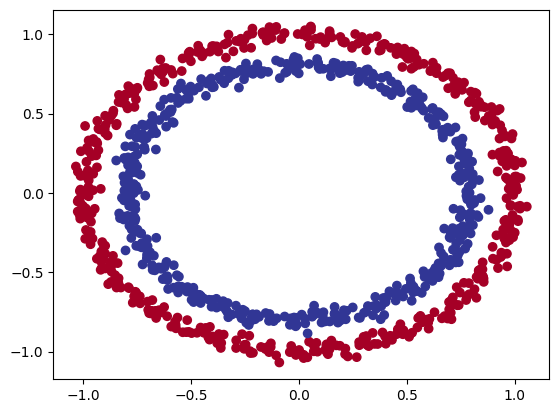

In [4]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

## Input and Output shapes

In [5]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
# How many samples are we working with?
len(X), len(y)

(1000, 1000)

## Steps in modelling

The steps in modelling wiht TensorFlow:
1. Import a model or Create it
2. Compile a model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [7]:
import tensorflow as tf

# Set the random seed
tf.random.set_seed(28)

# Creating a model using Sequential API
model = tf.keras.Sequential(name = 'Model_1')
model.add(tf.keras.layers.Dense(1))

# Compiling a model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ['accuracy'])

# Fitting a model
model.fit(X, y, epochs = 200, verbose = 0)

In [8]:
model.evaluate(X, y)


32/32 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.5000


[0.6938086152076721, 0.5]

Since we're working on a binary classification problem and our model is getting around -50%

So let's add more layers

In [9]:
# Set the random seed
tf.random.set_seed(28)

# Creating a model with 2 layers
model_2 = tf.keras.Sequential(name = 'Model_1')
model_2.add(tf.keras.layers.Dense(1))
model_2.add(tf.keras.layers.Dense(1))

# Compiling the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ['accuracy'])

# Fitting the model
model_2.fit(X, y, epochs = 100, verbose = 0)

In [10]:
# Evaluating the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4810


[0.6931616067886353, 0.48100000619888306]

## Improve our model

In [11]:
# Set the random seed
tf.random.set_seed(28)

# Creating a new model with more units and layers
model_3 = tf.keras.Sequential(name = 'Model_3')
model_3.add(tf.keras.layers.Dense(100))
model_3.add(tf.keras.layers.Dense(10))
model_3.add(tf.keras.layers.Dense(1))

# Compiling the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ['accuracy'])

# Fitting the model
model_3.fit(X, y, epochs = 100, verbose = 0)

In [12]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5150


[0.6937688589096069, 0.5149999856948853]

To Visualize our model predictions using the `plot_decision_boundary()`

In [13]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model prediciting on X.

  """
  # Define the axis boundaries of the plot and create meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make to make predictions)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make Predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print('doing multiclass classification')
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)

  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classification


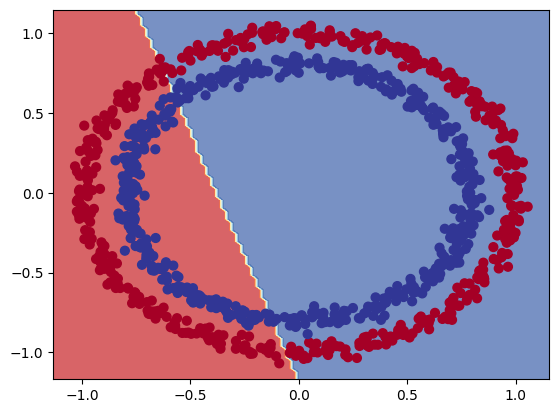

In [14]:
# Check out the predictions our model is asking
plot_decision_boundary(model = model_3,
                       X = X,
                       y = y)

In [15]:
# Let's see if our model can be used for regression

tf.random.set_seed(28)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Splitting our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
try:
  model_3.fit(tf.expand_dims(X_reg_train, axis = 1), y_reg_train, epochs = 100, verbose = 0)
except Exception as e:
  print(e)

in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception enco

We compiled the model for a classification model, but this is regression, let's recreate the model

In [16]:
# Setup random seed
tf.random.set_seed(28)

# 1. Create the model
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(100))
model_3.add(tf.keras.layers.Dense(10))
model_3.add(tf.keras.layers.Dense(1))

# 2. Compiling the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ['mae'])

# 3. Fitting the model
model_3.fit(tf.expand_dims(X_reg_train, axis = 1), y_reg_train, epochs = 100, verbose = 0)

In [17]:
model_3.evaluate(X_reg_train, y_reg_train)

5/5 [==============================] - 0s 3ms/step - loss: 28.4541 - mae: 28.4541


[28.454092025756836, 28.454092025756836]

2/2 [==============================] - 0s 5ms/step


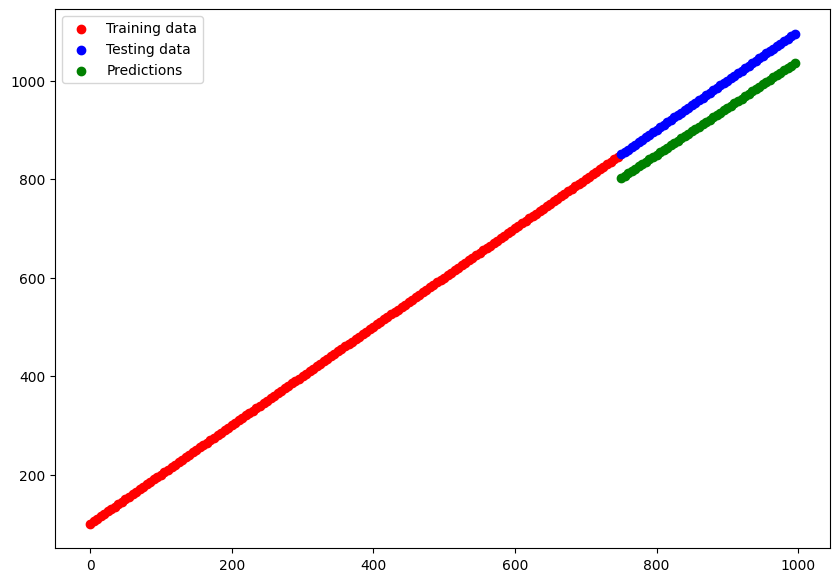

In [18]:
# Make predictions with the trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize = (10, 7))
plt.scatter(X_reg_train, y_reg_train, c = 'r', label = 'Training data')
plt.scatter(X_reg_test, y_reg_test, c = 'b', label = 'Testing data')
plt.scatter(X_reg_test, y_reg_preds, c = 'g', label = 'Predictions')
plt.legend()

## The missing piece: Non-Linearity

In [19]:
# Set the random seed
tf.random.set_seed(28)

# Creating a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, activation = tf.keras.activations.linear))

# Compiling the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ['accuracy'])

# Fitting the model
history = model.fit(tf.expand_dims(X, axis = 1), y, epochs = 100, verbose = 0)

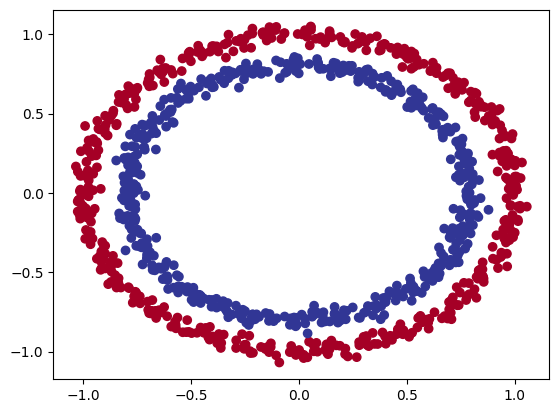

In [20]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


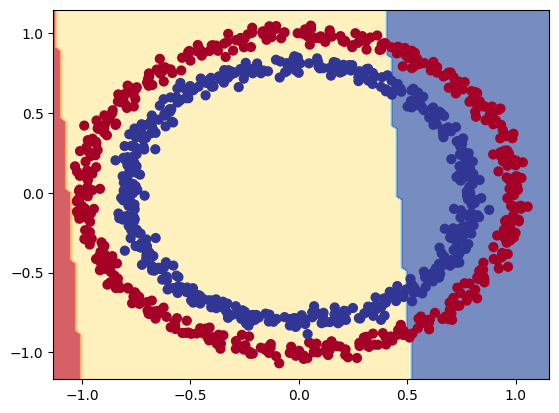

In [21]:
plot_decision_boundary(model, X, y)

In [22]:
# Setting the random seed
tf.random.set_seed(28)

# Creating a model with activation other that `linear`
model_non_linear = tf.keras.Sequential()
model_non_linear.add(tf.keras.layers.Dense(1, activation = 'relu'))

# Compiling the model
model_non_linear.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                         optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                         metrics = ['accuracy'])

# Fitting the model
history = model_non_linear.fit(tf.expand_dims(X, axis = 1), y, epochs = 100, verbose = 0)


In [23]:
# Setting the random seed
tf.random.set_seed(28)

# Creating a model
model_nl_2 = tf.keras.Sequential()
model_nl_2.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_nl_2.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_nl_2.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# Compile the model
model_nl_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                   optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                   metrics = ['accuracy'])

# Fitting the model
history = model_nl_2.fit(X, y, epochs = 300, verbose = 0)

In [24]:
# Evaluate the model
model_nl_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0175 - accuracy: 1.0000


[0.017497504130005836, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classification


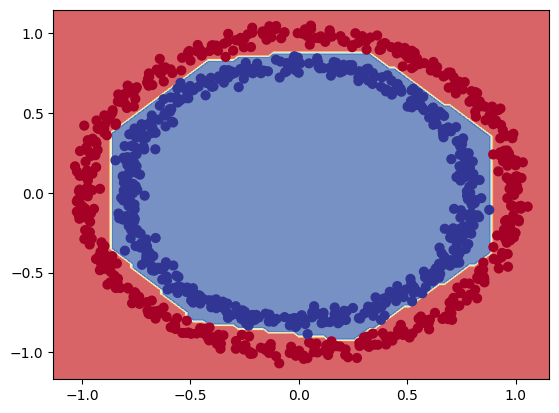

In [25]:
# Plotting the model
plot_decision_boundary(model_nl_2, X, y)

## Create a toy tensor (similar to the data we pass into our models)

In [26]:
# Creating a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

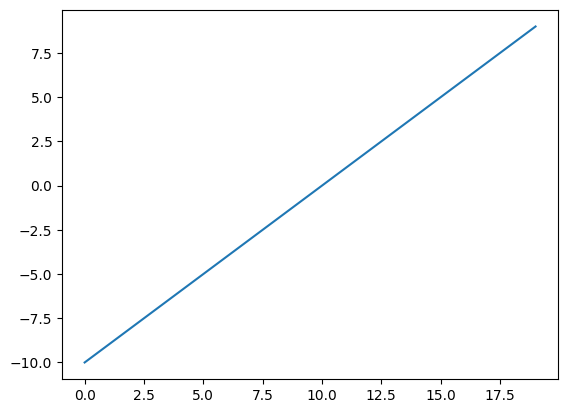

In [27]:
# Visualize it
plt.plot(A)

In [28]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1+exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

#W USe the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

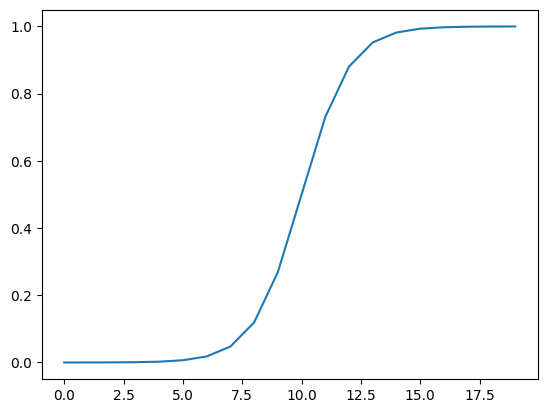

In [29]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [30]:
# Lets's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass ou toy tensorto our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

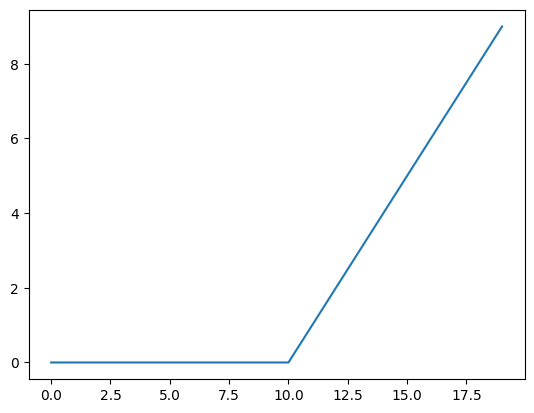

In [31]:
# Plot relu modified tensor
plt.plot(relu(A))

In [32]:
# Let's try linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [33]:
# Does the linear activation fundtion change anything
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification model

In [34]:
# Check how many examples we have
len(X)

1000

In [35]:
# Using tran_test_split to split the data into train and test set
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.8, random_state = 28)

train_X.shape, train_y.shape, test_X.shape, test_y.shape

((800, 2), (800,), (200, 2), (200,))

In [36]:
# Creating a model to fit on training data and evaluating on testing data
from sklearn.metrics import accuracy_score

# Set up the random seed
tf.random.set_seed(28)

# Creating the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, activation = 'relu'))
model.add(tf.keras.layers.Dense(4, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# Compiling the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ['accuracy'])

# Fitting the model
history = model.fit(train_X, train_y, epochs = 100, verbose = 0)

# Prediciting with the model
pred_y = model.predict(test_X)

# Evaluating with the model
model.evaluate(test_X, test_y)

7/7 [==============================] - 0s 2ms/step - loss: 0.0461 - accuracy: 0.9900


[0.04606448486447334, 0.9900000095367432]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


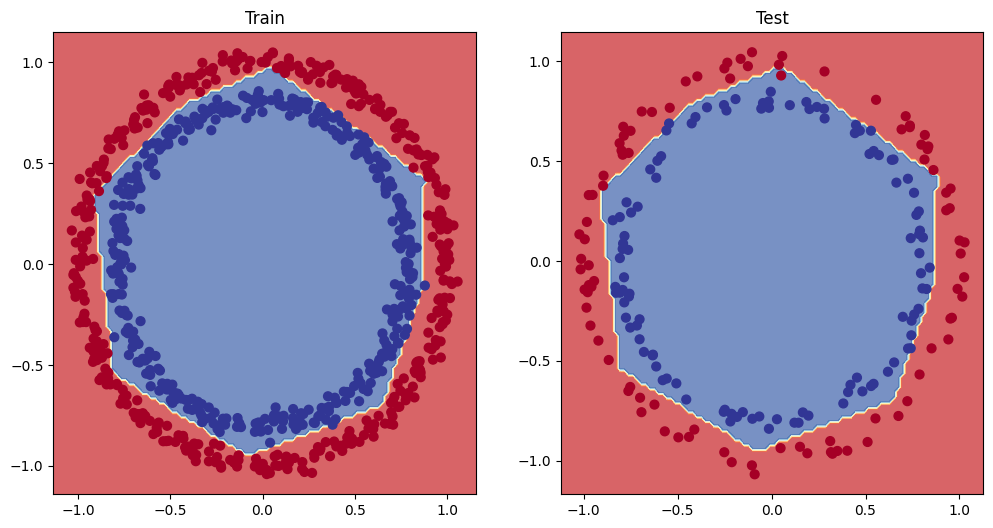

In [37]:
# Plot the decision boundary for train and test sets
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model, X = train_X, y = train_y)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model, X = test_X, y = test_y)
plt.show()

## Plot the loss or training curves

In [38]:
# Creating a DataFrame using history variable
df = pd.DataFrame(history.history)
df

,loss,accuracy
0,0.691209,0.51375
1,0.684246,0.52875
2,0.680847,0.52000
3,0.675966,0.58375
4,0.669025,0.58125
...,...,...
95,0.033259,0.99375
96,0.030700,0.99500
97,0.032406,0.99250
98,0.029544,0.99375


Text(0.5, 1.0, 'Loss curves')

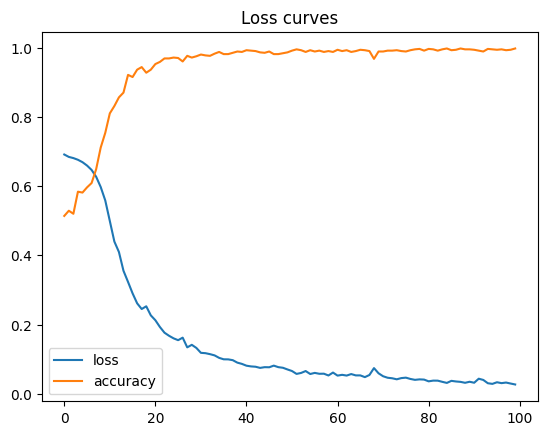

In [39]:
# Plot the loss curves
df.plot()
plt.title('Loss curves')

## Finding the best learning rate

* **A learning rate callback** - You can think callback as an extra piece of functionality, you can add to *while* its training.

* Another model (we could use the same one as above, but we're practising building models here)

* A modified loss curves plot.

In [40]:
# Setting random seed
tf.random.set_seed(28)

# Creating a model
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_1.add(tf.keras.layers.Dense(4,activation = 'relu'))
model_1.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# Compiling the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Create a learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20) )

# Fitting the model
history_1 = model.fit(train_X, train_y, epochs = 100, verbose = 0, callbacks = [lr_scheduler])


<Axes: xlabel='epochs'>

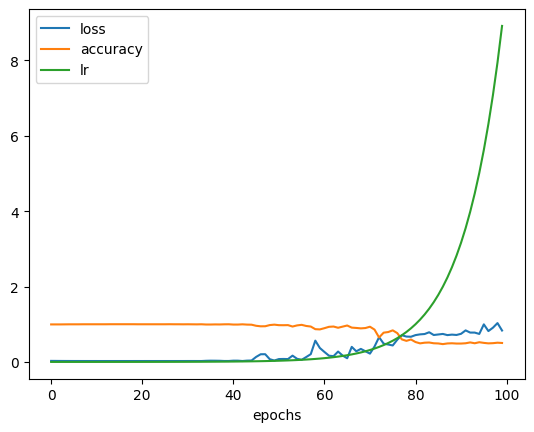

In [41]:
# Creating a datframe with `history.history`
pd.DataFrame(history_1.history).plot(xlabel = 'epochs')

Text(0.5, 1.0, 'Learning rate Vs Loss')

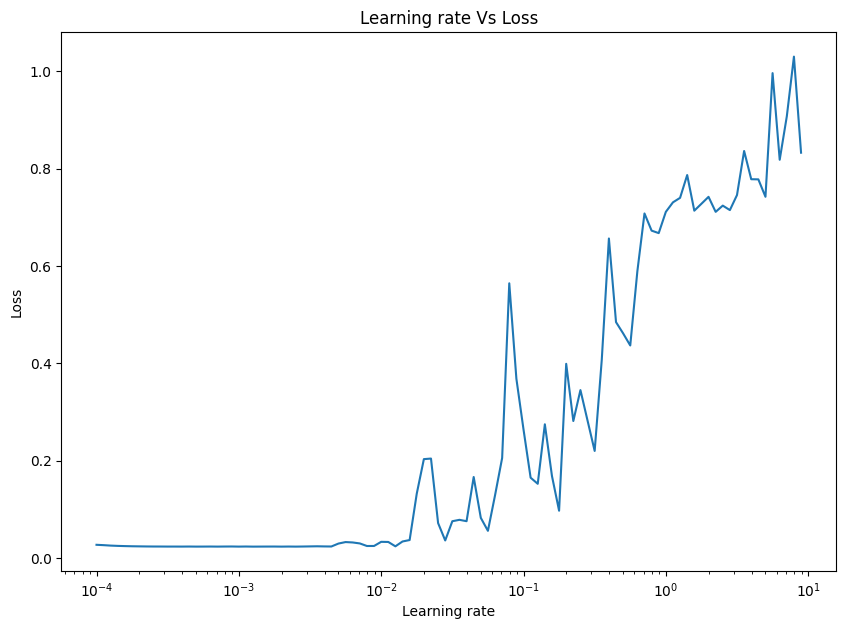

In [42]:
# Plot the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize = (10, 7))
plt.semilogx(lrs, history_1.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel('Loss')
plt.title('Learning rate Vs Loss')

In [43]:
# Creating models with different learning rates 0.01 & 0.02

# Set the random seed
tf.random.set_seed(28)

# Creating a model
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_2.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_2.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# Compiling the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
                metrics = ['accuracy'])

# Fit the model for 20 epochs (5 less than before)
history_2 = model_2.fit(train_X, train_y, epochs = 100, verbose = 0)

In [44]:
# Evaluate model on the test dataset
model_2.evaluate(test_X, test_y)

7/7 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 1.0000


[0.00903843529522419, 1.0]

In [45]:
model.evaluate(test_X, test_y)

7/7 [==============================] - 0s 2ms/step - loss: 1.6512 - accuracy: 0.4600


[1.6511672735214233, 0.46000000834465027]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


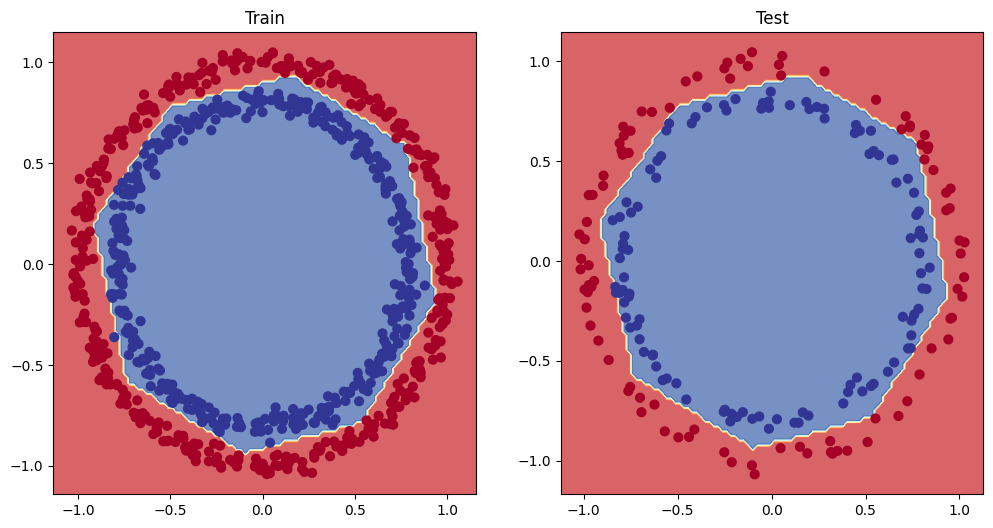

In [46]:
# Plot the decision boundary for the model_2
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_2, X = train_X, y = train_y)
plt.subplot(1, 2 ,2)
plt.title('Test')
plot_decision_boundary(model = model_2, X = test_X, y = test_y)
plt.show()

In [47]:
# Check the accurcay of our model
loss, accuracy = model_2.evaluate(test_X, test_y)
print(f'Model loss on the test set: {loss:.2f}')
print(f'Model accuracy on the test set: {(accuracy*100):.2f}')

7/7 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 1.0000
Model loss on the test set: 0.01
Model accuracy on the test set: 100.00


## Working on Confusion Matrix

In [48]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predicitons
pred_y = model_2.predict(test_X)

# Create conffusion matrix
try:
  confusion_matrix(test_y, pred_y)
except Exception:
  print('error')

7/7 [==============================] - 0s 2ms/step
error


Our predictions are in **prediction probability** form, and that will give out an error.

In [49]:
# Convert prediction probabilities to binary format
pred_y = tf.round(pred_y)

In [50]:
# Create conffusion matrix
confusion_matrix(test_y, pred_y)

array([[ 92,   0],
       [  0, 108]])

In [51]:
# Plotting the confusion matrix
import itertools
def conf_mat(test_y, pred_y, text_size = 20, classes = None, figsize = (10, 10)):
  # Create the confusion matrix
  cm = confusion_matrix(test_y, pred_y)
  cm_norm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize = figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title = 'Confusion Matrix',
        xlabel = 'Predicted label',
        ylabel = 'True label',
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  # Set axis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size + 5)
  ax.xaxis.label.set_size(text_size + 5)
  ax.title.set_size(text_size + 5)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j] * 100:.1f})',
            horizontalalignment = 'center',
            color = 'white' if cm[i, j] > threshold else 'black',
            size = text_size)


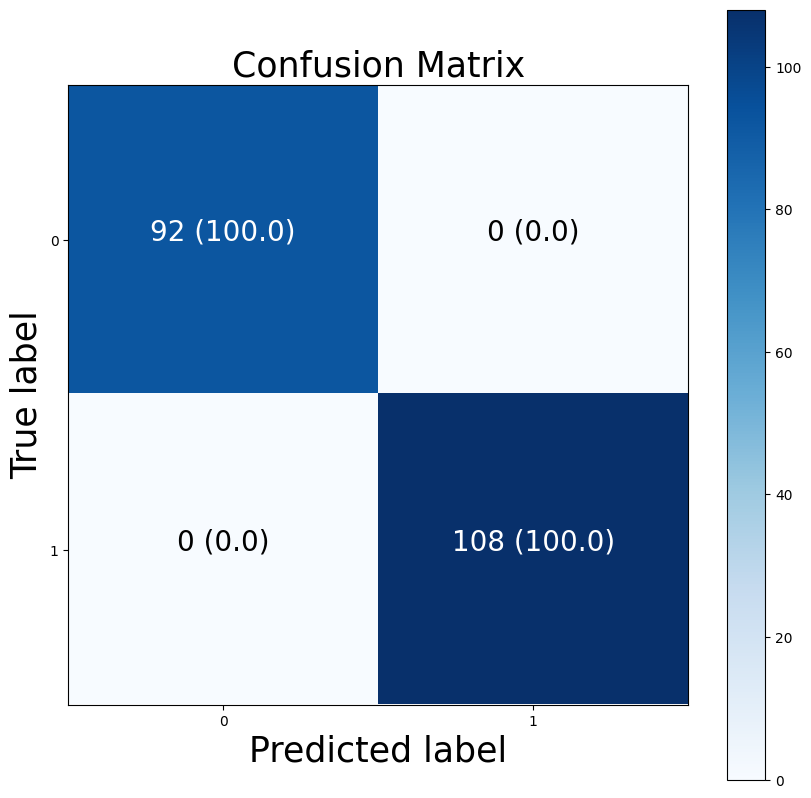

In [52]:
conf_mat(test_y, pred_y)

# Working with a Larger Example (multiclass classification)

In [53]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [54]:
# Creating a dictionary for better understanding of labels
label_description = { 0: 'T-shirt/top',
                      1: 'Trouser',
                      2: 'Pullover',
                      3: 'Dress',
                      4: 'Coat',
                      5: 'Sandal',
                      6: 'Shirt',
                      7: 'Sneaker',
                      8: 'Bag',
                      9: 'Ankle Boot'}

In [ ]:
# Show the first training example
print(f'Training Sample:\n\n{train_data[0]}\n')
print(f'Training Label:\n{train_labels[0]}\n')

In [56]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

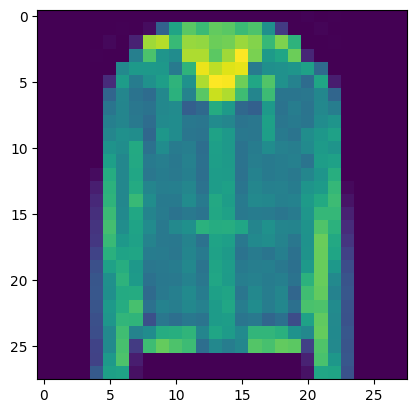

In [57]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[28])

In [58]:
# Check out sample label
label_description[train_labels[28]]

'Coat'

Text(0.5, 1.0, 'Pullover')

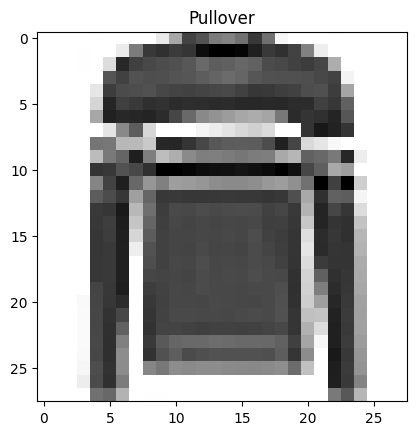

In [59]:
# Plotting an example image and its label
plt.imshow(train_data[5], cmap = plt.cm.binary)
plt.title(label_description[train_labels[5]])

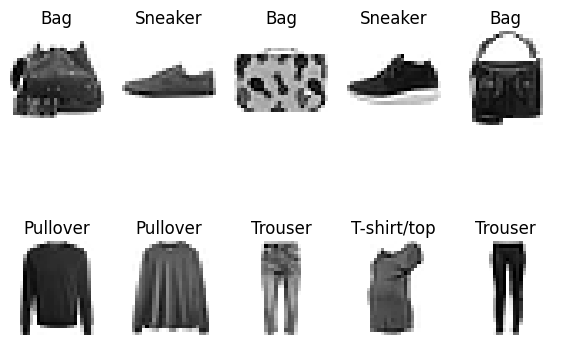

In [60]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize = (7, 5))
for i in range(10):
  ax = plt.subplot(2, 5, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(label_description[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

for our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're gooing to have to tweak a few things:
* Input shape - 28 x 28 (the shape of one image)
* Output shape - 10 (one per class of clothing)
* Loss function - tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded, use CategoticalCrossentropy()
  * If your labels are integer form use SparseCategoricalCrossEntropy()
* Output layer activation - Softmax (not sigmoid)

In [ ]:
# Set the random seed
tf.random.set_seed(28)

# Creating the model
model = tf.keras.Sequential(name = 'MNIST_model')
model.add(tf.keras.layers.Flatten(input_shape = [28, 28]))
model.add(tf.keras.layers.Dense(4, activation = 'relu'))
model.add(tf.keras.layers.Dense(4, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

# Compiling the model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
              metrics = ['accuracy'])

# Fitting the model
history = model.fit(train_data, train_labels, epochs = 30, verbose = 1, validation_data = (test_data, test_labels))


In [62]:
model.summary()

Model: "MNIST_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 4)                 3140      
                                                                 
 dense_24 (Dense)            (None, 4)                 20        
                                                                 
 dense_25 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [64]:
# Scaling or Normalizing our data by dividing it with the maximum value
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max after changes
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Let's build another model after normalization

# Set the random seed
tf.random.set_seed(28)

# Create a model
model_1 = tf.keras.Sequential(name = 'MNIST_model_1')
model_1.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model_1.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_1.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_1.add(tf.keras.layers.Dense(10, activation = 'softmax'))

# Compile the model
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                metrics = ['accuracy'])

# Fitting the model
history_1 = model_1.fit(train_data_norm, train_labels, verbose = 1, epochs = 30, validation_data = (test_data_norm, test_labels))

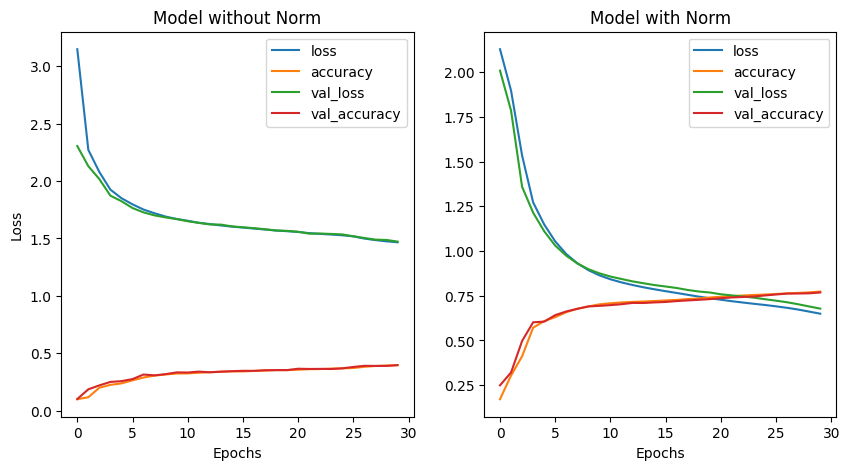

In [66]:
# Plotting the graphs of the two models

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.plot(pd.DataFrame(history.history), )
plt.title('Model without Norm')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(history.history)

plt.subplot(1, 2, 2)
plt.plot(pd.DataFrame(history_1.history))
plt.title('Model with Norm')
plt.xlabel('Epochs')
plt.legend(history_1.history)

## Finding the ideal learning rate

In [ ]:
# Set the random seed
tf.random.set_seed(28)

# Create model
model_lr = tf.keras.Sequential()
model_lr.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model_lr.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_lr.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_lr.add(tf.keras.layers.Dense(10, activation = 'softmax'))

# Compile the model
model_lr.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# Create the  learning callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
find_lr_history = model_lr.fit(train_data_norm, train_labels, epochs = 30, verbose = 1, validation_data = (test_data_norm, test_labels), callbacks = [lr_scheduler])

<Figure size 1000x500 with 0 Axes>

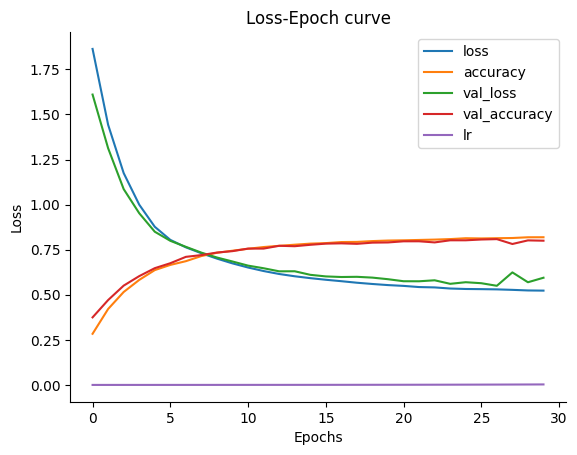

In [68]:
# Plotting the graph of the model

plt.figure(figsize = (10, 5))
pd.DataFrame(find_lr_history.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss-Epoch curve')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

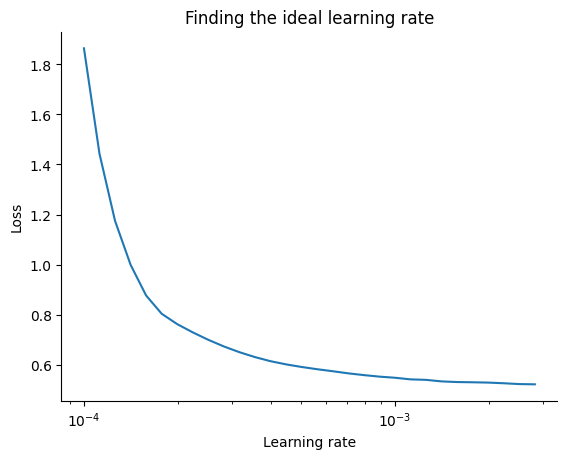

In [69]:
lrs = 1e-4 * (10**(tf.range(30)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

## Evaluating our multi-class classification model

313/313 [==============================] - 1s 2ms/step


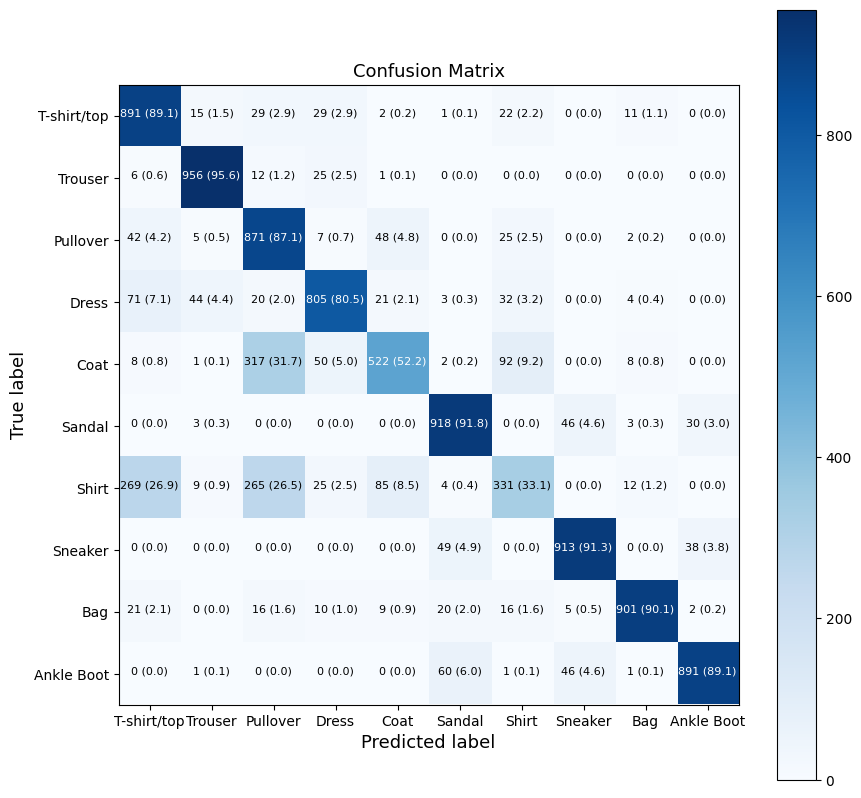

In [70]:
# Calling the created confusion matrix
conf_mat(test_labels, model_lr.predict(test_data_norm).argmax(axis = 1), text_size = 8, classes = list(label_description.values()))

## Creating a function to easy visualization

In [71]:
def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it, and labels it with a prediction and truth labels
  """
  # Set up random integer
  i = random.randint(0, len(images))
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model_lr.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap = plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Add xlabel information (prediction/true label)
  plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color = color)

1/1 [==============================] - 0s 21ms/step


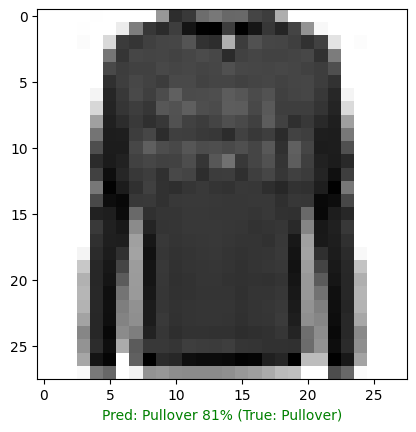

In [72]:
# Checking a random image and its predicition
plot_random_image(model = model_lr, images = test_data_norm, true_labels = test_labels, classes = list(label_description.values()))

1/1 [==============================] - 0s 23ms/step


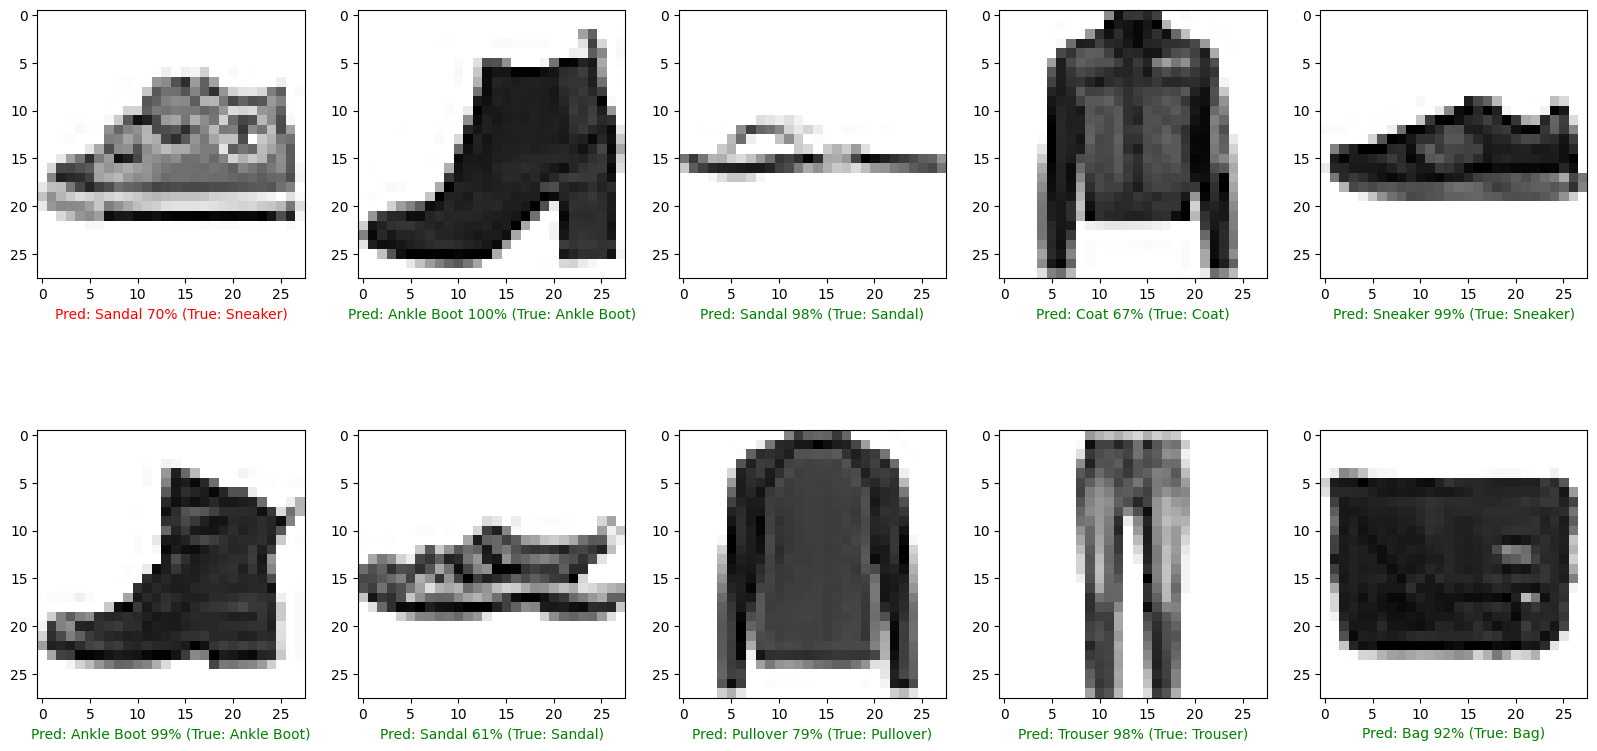

In [73]:
# Plotting a figure with 10 random images
plt.figure(figsize = (20, 10))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plot_random_image(model_lr, test_data_norm, test_labels, list(label_description.values()))

## What is our model learning?

In [74]:
# Find the layers of our most recent model
model_lr.layers

In [76]:
# Extract a prticular layer
model_lr.layers[1]

In [78]:
# Get the patters of a layer in our network
weights, biases = model_lr.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.39036968, -0.99640304, -0.6491337 , -0.11410856],
        [ 0.4818086 ,  1.0772746 , -0.32081842, -1.4989568 ],
        [-0.20276004, -0.33103502, -1.3198853 ,  0.7206185 ],
        ...,
        [-0.11150733,  0.25583076, -0.7027792 , -0.18923739],
        [-0.18042791, -0.06776697, -0.10487224, -0.13786411],
        [ 0.11979812,  0.18638505, -0.7231126 ,  0.71259737]],
       dtype=float32),
 (784, 4))

In [79]:
model_lr.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 4)                 3140      
                                                                 
 dense_30 (Dense)            (None, 4)                 20        
                                                                 
 dense_31 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Checking the Bias vector

In [80]:
# Bias and Bias shapes
biases, biases.shape

(array([1.7855643 , 0.7624304 , 0.62364686, 0.2618858 ], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector also gets initialized as zeros in keras Dense layer.

The bias vector dictates how much the patterns within the correspondig weights should influence the next layer.

In [82]:
model_lr.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 4)                 3140      
                                                                 
 dense_30 (Dense)            (None, 4)                 20        
                                                                 
 dense_31 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


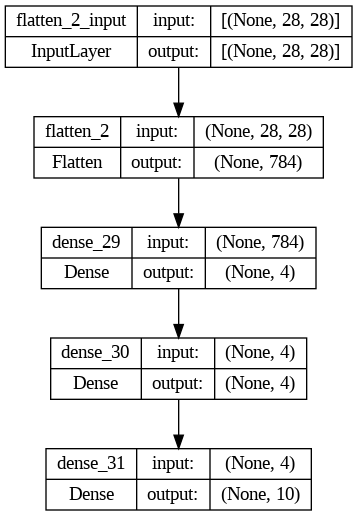

In [84]:
# Plotting the model flow
tf.keras.utils.plot_model(model_lr, show_shapes = True)